In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import cv2 as cv

In [2]:
image = cv.imread('images/IMG_1802.jpeg')


# Fuzzy c-means
modified from [geeks for geeks](https://www.geeksforgeeks.org/image-segmentation-using-fuzzy-c-means-clustering/)

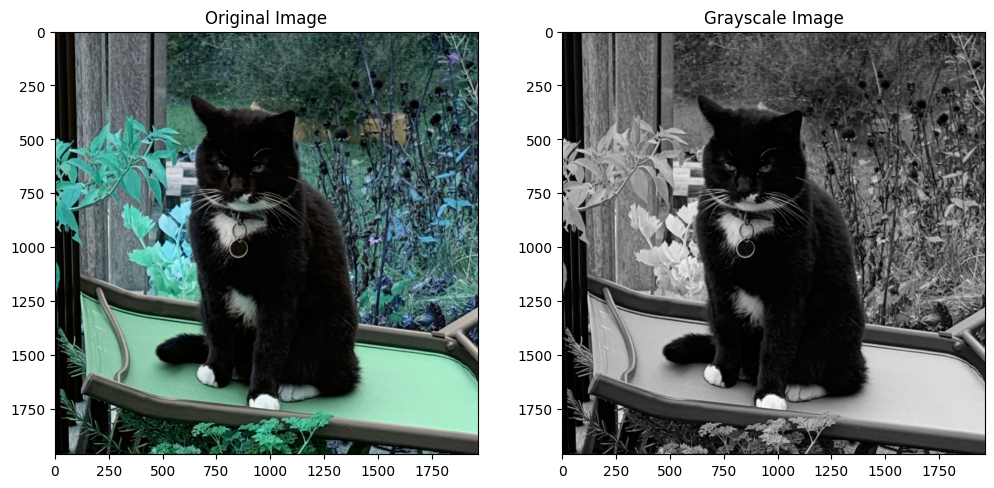

In [3]:
# Handle images with an alpha channel by considering only the first three channels (RGB)
if image.shape[-1] == 4:
    image = image[..., :3]

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.show()

In [4]:
# Reshape the image into a 1D array
# pixels = gray_image.reshape(-1, 1)

## LET US FORGET ABOUT GRAYSCALE
pixels = image.reshape(-1, 3)

In [5]:
# Define the number of clusters
n_clusters = 3

# Apply Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    pixels.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

# Get the cluster membership for each pixel
cluster_membership = np.argmax(u, axis=0)

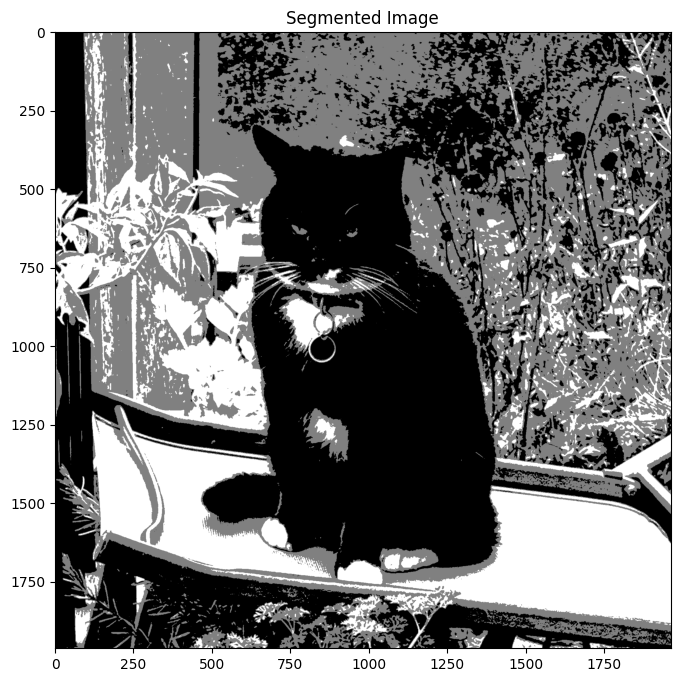

In [6]:
# Reshape the clustered data back to the original image shape
segmented_image = cluster_membership.reshape(image.shape[0:2])

# Display the segmented image
plt.figure(figsize=(8, 8))
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.show()

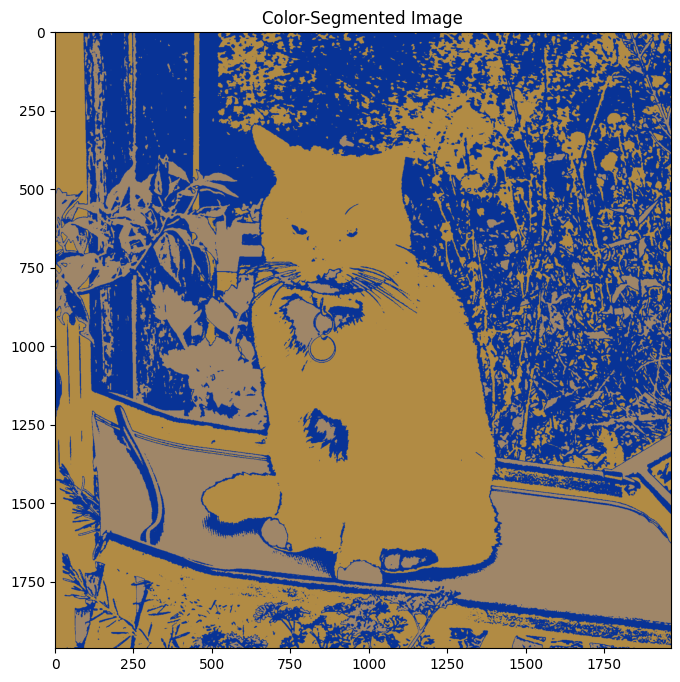

In [7]:
# Create an empty image with the same shape as the original
colored_segmented_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3))

# Assign colors to each cluster
for i in range(n_clusters):
    colored_segmented_image[segmented_image == i] = np.random.rand(3)

# Display the color-segmented image
plt.figure(figsize=(8, 8))
plt.title('Color-Segmented Image')
plt.imshow(colored_segmented_image)
plt.show()

# Watershed algorithm
taken from [opencv doc](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html)

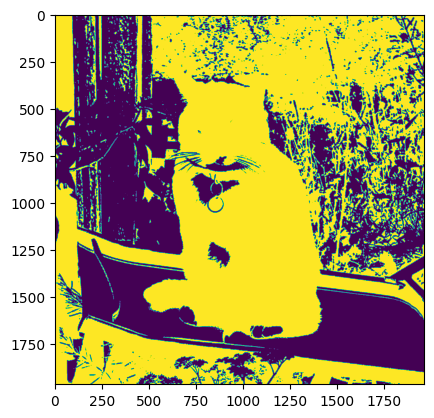

In [8]:
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.imshow(thresh)

In [9]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


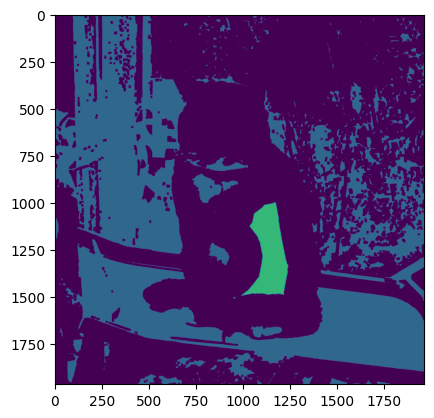

In [10]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


plt.imshow(markers)

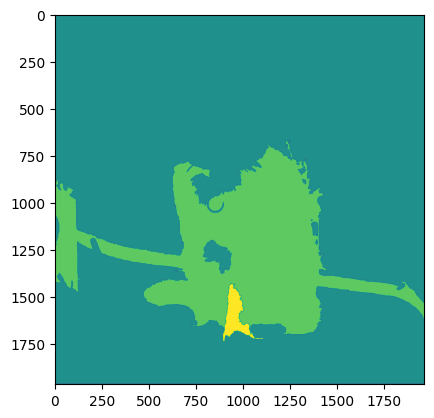

In [11]:
markers = cv.watershed(image,markers)
image[markers == -1] = [255,0,0]

plt.imshow(markers)